In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[2]

4

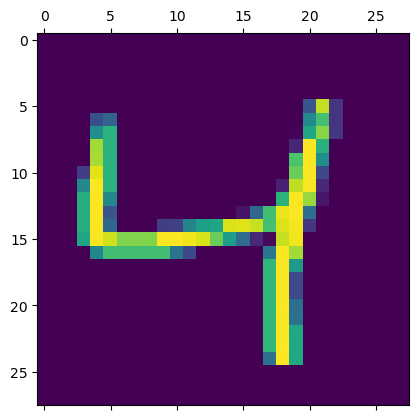

In [7]:
plt.matshow(X_train[2])

In [8]:
X_train=X_train /255
X_test=X_test/ 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4681 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9255


In [14]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 994us/step - loss: 0.2652 - accuracy: 0.9258


[0.26517096161842346, 0.9258000254631042]

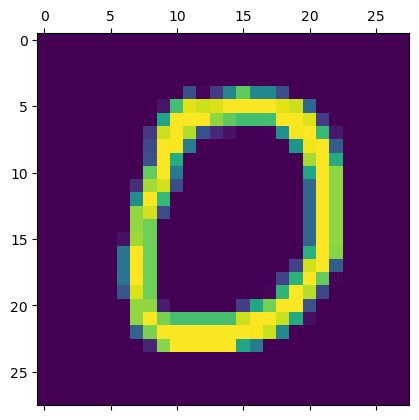

In [15]:
plt.matshow(X_test[10])

In [16]:
predicted = model.predict(X_test_flattened)

In [17]:
predicted[10]

array([9.9854159e-01, 1.3972998e-07, 5.7226157e-01, 8.8036448e-02,
       2.1746755e-04, 8.2832187e-01, 5.4607093e-02, 2.5884117e-05,
       5.1998281e-01, 3.3983588e-04], dtype=float32)

In [18]:
np.argmax(predicted[10])

0

In [19]:
predicted_labels= [np.argmax(i) for i in predicted]

In [20]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    5,    9,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   4,    8,  936,   13,    8,    3,   13,   11,   34,    2],
       [   4,    0,   25,  914,    0,   24,    2,   11,   23,    7],
       [   1,    1,    6,    0,  922,    0,   10,    4,   10,   28],
       [   9,    2,    6,   33,   12,  773,   18,    7,   27,    5],
       [   9,    3,    7,    1,    7,    9,  919,    2,    1,    0],
       [   1,    5,   24,    4,    9,    0,    0,  956,    2,   27],
       [   8,    8,    7,   22,    9,   29,   10,   13,  863,    5],
       [  10,    7,    2,   11,   33,    8,    0,   27,    6,  905]])>

Text(50.722222222222214, 0.5, 'Truth')

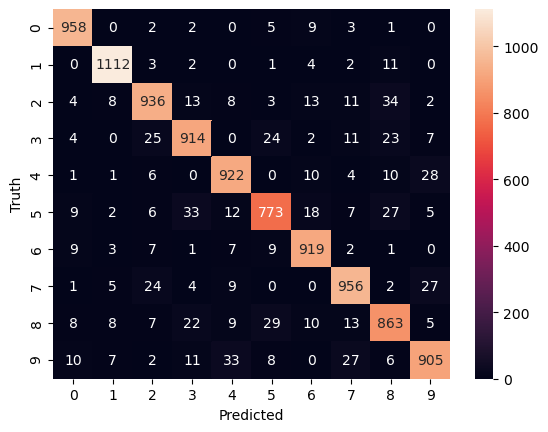

In [23]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
#Adding a hidden layer
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1219 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0837 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9840


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9773


[0.07832210510969162, 0.9772999882698059]

In [27]:
# using keras.flatten
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1208 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9842


In [29]:
%load_ext tensorboard
%tensorboard --logdir logs/fit